In [8]:
import pandas as pd
from Bio import AlignIO
import os
import matplotlib.pyplot as plt

In [2]:
path = '../homology_transfer/pipeline_MSA_uniprot/data_snake/09_align_selection/'

In [11]:
align = AlignIO.read(open('../homology_transfer/pipeline_MSA_uniprot/data_snake/09_align_selection/P00519_clustalO_fullidentity_all.fasta.aln'), format= 'fasta')

# Distribution seqs/MSA

In [13]:
len(align) # hacer una distribucion

104

In [124]:
# iterate over the MSA files
seqs_msa = {}
l = []
no_errors = 0
i = 0
for filename in os.listdir(path):
    f = os.path.join(path, filename) # is the complete path to each msa

    if os.path.isfile(f):
        
        # Check if file is empty
        check_file = os.stat(f).st_size
        if check_file != 0:
            msa_name = filename.split(".")[0].split("_")
            msa_name = msa_name[0] + "_" + msa_name[3]
            # align objects can be treated as lists of SeqRecord objects
            align = AlignIO.read(open(f), format= 'fasta')
            for record in align:
                try:
                    l.append([msa_name, record.id, len(record)])
                    #print("%s %i" % (record.id, len(record)))
                    seqs_msa[msa_name] = len(align)
                    i += 1
                except:
                    print(f"error in file {filename}")
                    no_errors += 1

In [118]:
i

42148

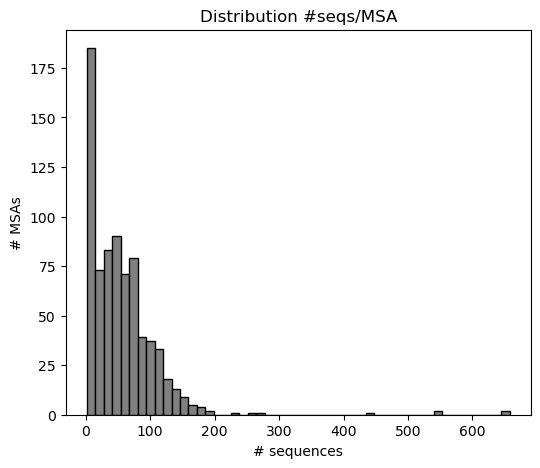

In [79]:
plt.figure(figsize=(6, 5))
plt.hist(seqs_msa.values(), bins= 50, color= 'gray', edgecolor= 'black')
plt.title("Distribution #seqs/MSA")
plt.ylabel("# MSAs")
plt.xlabel('# sequences')
plt.show()

In [109]:
df= pd.DataFrame.from_dict(seqs_msa, orient= 'index').reset_index().rename(columns= {'index': 'msa', 0: 'no_seqs'})

<AxesSubplot:>

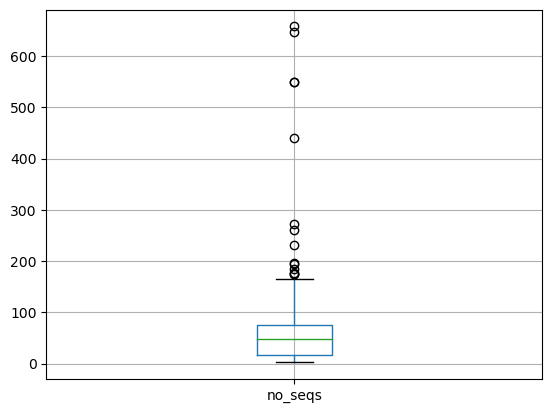

In [110]:
df.boxplot()

# Orthologs overlap

In [128]:
all_msas = pd.DataFrame(l, columns= ['msa', 'uniprot', 'length_msa'])
all_msas

,msa,uniprot,length_msa
0,O49717_all,O49717,597
1,O49717_all,A0A0D3A511,597
2,O49717_all,A0A364KUL0,597
3,O49717_all,D7MEB5,597
4,O49717_all,M4DAR5,597
...,...,...,...
42143,Q9NJU9_80,A0A0L7M6Y1,563
42144,Q9FMP5_80,Q9FMP5,586
42145,Q9FMP5_80,A0A087G6J2,586
42146,Q9FMP5_80,M4E3L4,586


In [132]:
all_msas[all_msas.msa.str.endswith("all")]

,msa,uniprot,length_msa
0,O49717_all,O49717,597
1,O49717_all,A0A0D3A511,597
2,O49717_all,A0A364KUL0,597
3,O49717_all,D7MEB5,597
4,O49717_all,M4DAR5,597
...,...,...,...
42003,Q16644_all,T1JWP1,836
42004,Q16644_all,U3K2Q0,836
42005,Q16644_all,V4AHH7,836
42006,Q16644_all,W2SX23,836


In [130]:
all_msas.groupby("msa")['uniprot'].size()

msa
A0A2I0BVG8_60      6
A0A2I0BVG8_80      5
A0A2I0BVG8_all    45
A0A509AFG4_60      6
A0A509AFG4_80      2
                  ..
Q9ZV15_80          3
Q9ZV15_all        77
W7JX98_60          5
W7JX98_80          5
W7JX98_all        61
Name: uniprot, Length: 749, dtype: int64

# Mapping PDBs to orthologs 

In [86]:
sift = pd.read_csv(
    '../datasets/uniprot_segments_observed.tsv.gz',
    sep= '\t',
    compression= 'gzip',
    skiprows= 1
)
sift.columns = sift.columns.str.lower()

In [111]:
# Mapping: pdns for each uniprot
pdb_uniprot = sift[['pdb', 'sp_primary']].drop_duplicates().rename(columns= {'sp_primary': 'uniprot_acc'})
pdb_uniprot

,pdb,uniprot_acc
0,121p,P01112
1,132l,P00698
2,133l,P61626
3,129l,P00720
4,139l,P00720
...,...,...
977587,6eae,P03420
977589,6e9p,P9WFY1
977591,6e9p,P9WFX9
977601,6eaf,P03420


In [ ]:
# Get list of orthologs
